In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Exploring the data

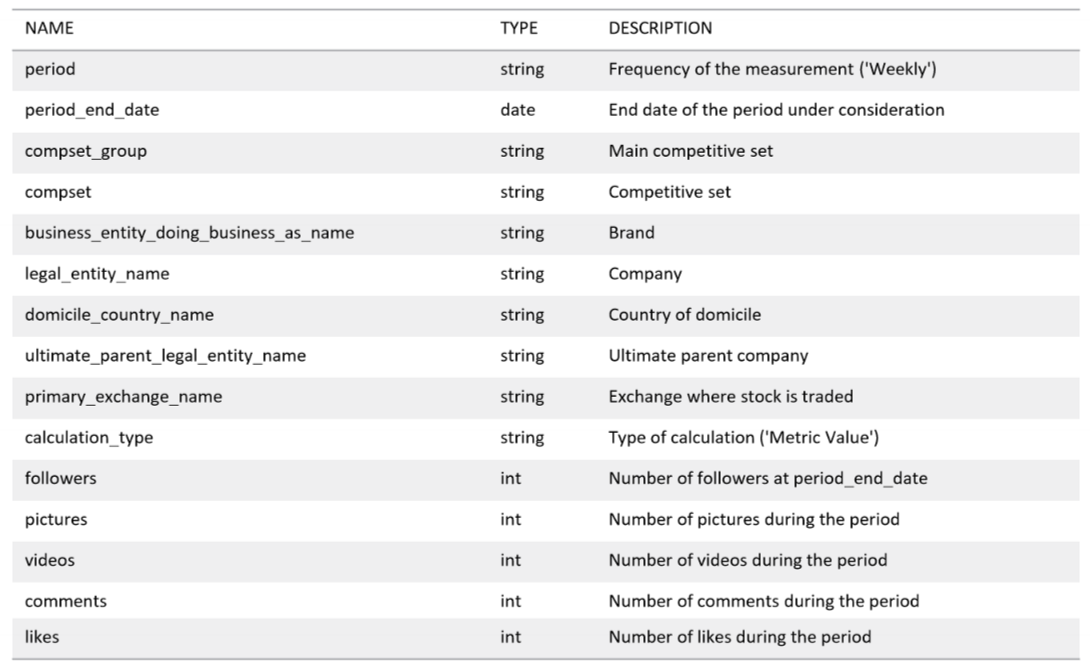

In [2]:
data = pd.read_csv("skylab_instagram_datathon_dataset.csv", sep=";")
data.drop(columns=['period', 'calculation_type'], inplace=True)
data = data.sort_values(by="period_end_date")

In [3]:
data.describe()

,followers,pictures,videos,comments,likes
count,5.792580e+05,695803.000000,684349.000000,6.953430e+05,6.959770e+05
mean,1.342432e+07,344.272540,61.244426,3.043246e+04,2.163189e+06
std,1.106975e+08,2777.396873,564.468480,2.766459e+05,1.803193e+07
min,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00
25%,3.013372e+05,19.000000,2.000000,3.710000e+02,1.727700e+04
50%,1.104144e+06,44.000000,7.000000,1.435000e+03,9.318400e+04
75%,4.479325e+06,122.000000,20.000000,5.872000e+03,4.577470e+05
max,3.502565e+09,141746.000000,35905.000000,1.732046e+07,7.120711e+08


## What do the columns mean?

In [4]:
versace_df = data[lambda x: x['business_entity_doing_business_as_name'] == "Versace"].copy()

In [5]:
versace_df = versace_df.sort_values(by="period_end_date").copy()

In [ ]:
# compset

### removing duplicated rows
We noticed some rows are identical except the "compset" column. This interferes with true statistics for one company because it gets included in the calculation multiple times.

### Look into Versace
We wanted to find out what are the columns representing. Do the values accumulate or do they reset every week. With some plotting time series we realized figured out likes, pictures, videos are reset every week and followers are just the absolute number of followers in that specific timestamp.

In [6]:
versace_clean_data = versace_df[['period_end_date','followers','pictures','videos','comments','likes']].drop_duplicates().copy()

In [7]:
fig = px.line(versace_clean_data, x='period_end_date', y=['followers','pictures','videos','comments','likes'])

fig.show()

In [8]:
fig = px.line(versace_clean_data, x='period_end_date', y=['pictures','videos'])

fig.show()

In [ ]:
versace_clean_data.head()

In [9]:
brand_name = "Versace"
plotting_df = data[lambda x: x['business_entity_doing_business_as_name'] == brand_name][['period_end_date','followers','pictures','videos','comments','likes']].drop_duplicates().copy()

# Create Plotly Express plot
fig = px.line(versace_clean_data, x='period_end_date', y=['followers','likes'])

# Add another trace for Value2 on a secondary y-axis
fig.add_trace(go.Scatter(x=versace_clean_data['period_end_date'], y=versace_clean_data['pictures'], name='pictures', yaxis='y2'))
fig.add_trace(go.Scatter(x=versace_clean_data['period_end_date'], y=versace_clean_data['videos'], name='videos', yaxis='y2'))
#fig.add_trace(go.Scatter(x=versace_clean_data['period_end_date'], y=versace_clean_data['comments'], name='comments', yaxis='y3'))

# Update layout to add secondary y-axis
fig.update_layout(
    yaxis2=dict(title='posts', overlaying='y', side='right'),
    #yaxis3=dict(title='comments', overlaying='y', side='left')
)

# Show plot
fig.show()


### Randomly selecting a company
We selected "GAF" as a company to get more feel of the data. We looked into instagram posts and likes from 3 years ago and confirmed that for example likes are reset every week. In GAF Instagram page we found some posts with some celebrity which made the likes to spike in that period and then come back after the period. This indicates that the likes are just for each week.

In [11]:
brand_name = "GAF"
plotting_df = data[lambda x: x['business_entity_doing_business_as_name'] == brand_name][['period_end_date','followers','pictures','videos','comments','likes']].drop_duplicates().copy()

# Create Plotly Express plot
fig = px.line(plotting_df, x='period_end_date', y='likes')

# Add another trace for Value2 on a secondary y-axis
fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['pictures'], name='pictures', yaxis='y2'))
fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['videos'], name='videos', yaxis='y2'))
#fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['likes'], name='likes', yaxis='y3'))

# Update layout to add secondary y-axis
fig.update_layout(
    yaxis2=dict(title='posts', overlaying='y', side='right'),
    #yaxis3=dict(title='likes', overlaying='y', side='left')
)

# Show plot
fig.show()


In [12]:
brand_name = "John John Denim"
plotting_df = data[lambda x: x['business_entity_doing_business_as_name'] == brand_name][['period_end_date','followers','pictures','videos','comments','likes']].drop_duplicates().copy()

# Create Plotly Express plot
fig = px.line(plotting_df, x='period_end_date', y='followers')

# Add another trace for Value2 on a secondary y-axis
fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['pictures'], name='pictures', yaxis='y2'))
fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['videos'], name='videos', yaxis='y2'))
fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['likes'], name='likes', yaxis='y3'))

# Update layout to add secondary y-axis
fig.update_layout(
    yaxis2=dict(title='posts', overlaying='y', side='right'),
    yaxis3=dict(title='likes', overlaying='y', side='left')
)

# Show plot
fig.show()


In [13]:
versace_clean_data.corr(numeric_only=True)

,followers,pictures,videos,comments,likes
followers,1.000000,-0.172824,0.038606,0.023902,0.139766
pictures,-0.172824,1.000000,0.418379,0.625027,0.736033
videos,0.038606,0.418379,1.000000,0.478753,0.558674
comments,0.023902,0.625027,0.478753,1.000000,0.803739
likes,0.139766,0.736033,0.558674,0.803739,1.000000


In [14]:
data.head()

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
77460,2015-01-03,Apparel Retail,Latam Apparel Retail,Hering,Hering,Brazil,GRUPO DE MODA SOMA SA,Bolsa de Valores de Sao Paulo (XBSP),NaN,21.0,2.0,360.0,20165.0
116410,2015-01-03,Luxury & Premium & Mainstream,Global Luxury Analysts Interest List,Longines,Swatch,Switzerland,Swatch,Six Swiss Exchange,NaN,3.0,NaN,21.0,1361.0
298746,2015-01-03,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,3.1 Phillip Lim,Alexander Wang Inc,NaN,Alexander Wang Inc,NaN,NaN,5.0,4.0,774.0,28397.0
226467,2015-01-03,Food Products,Plant-Based Meat,Quorn,Monde Nissin,Philippines,Monde Nissin,Philippine Stock Exchange Inc.,NaN,14.0,NaN,57.0,557.0
604225,2015-01-03,Luxury & Premium & Mainstream,Soft Luxury,Proenza Schouler,Proenza Schouler LLC,NaN,Proenza Schouler LLC,NaN,250681.0,NaN,NaN,NaN,NaN


* Followers is total followers:
    * Follower count is increasing and consistant with what google says follower counts were at the time

* Pictures is total number of pictures (same for videos):
    * Assumed true as pictures is very autocorrelated, and if it were new pictures posted that week it would be a lot more variable
    *  Also it is always a positive

    
* Likes and comments are the total number of likes and comments respectively
    * When likes goes down, this is correlated with pictures going down
    *  Also it is always a positive

In [16]:
data.head()

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
77460,2015-01-03,Apparel Retail,Latam Apparel Retail,Hering,Hering,Brazil,GRUPO DE MODA SOMA SA,Bolsa de Valores de Sao Paulo (XBSP),NaN,21.0,2.0,360.0,20165.0
116410,2015-01-03,Luxury & Premium & Mainstream,Global Luxury Analysts Interest List,Longines,Swatch,Switzerland,Swatch,Six Swiss Exchange,NaN,3.0,NaN,21.0,1361.0
298746,2015-01-03,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,3.1 Phillip Lim,Alexander Wang Inc,NaN,Alexander Wang Inc,NaN,NaN,5.0,4.0,774.0,28397.0
226467,2015-01-03,Food Products,Plant-Based Meat,Quorn,Monde Nissin,Philippines,Monde Nissin,Philippine Stock Exchange Inc.,NaN,14.0,NaN,57.0,557.0
604225,2015-01-03,Luxury & Premium & Mainstream,Soft Luxury,Proenza Schouler,Proenza Schouler LLC,NaN,Proenza Schouler LLC,NaN,250681.0,NaN,NaN,NaN,NaN


In [17]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')

## Stock Data

In [100]:
nike_df = data[data['business_entity_doing_business_as_name'] == 'Nike'].copy()

In [101]:
rows_with_nan = nike_df[nike_df.isna().any(axis=1)]
rows_with_nan

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
499853,2015-01-03,Sportswear & Athleisure,Sportswear,Nike,Nike,United States of America,Nike,New York Stock Exchange,24471305.0,146.0,NaN,91539.0,11632897.0
500348,2015-01-03,Sportswear & Athleisure,Sportswear & Athleisure,Nike,Nike,United States of America,Nike,New York Stock Exchange,24471305.0,146.0,NaN,91539.0,11632897.0
500208,2015-01-03,Sportswear & Athleisure,US Softlines Analyst Interest List,Nike,Nike,United States of America,Nike,New York Stock Exchange,24471305.0,146.0,NaN,91539.0,11632897.0


In [102]:
nike_df = nike_df[3:]

In [103]:
nike_stock_df = pd.read_csv("nike_data.csv")
nike_stock_df.head()

,Date,Close/Last,Volume,Open,High,Low
0,04/26/2024,$94.12,6115744,$94.59,$95.4174,$93.91
1,04/25/2024,$93.94,5317852,$94.00,$94.7891,$92.44
2,04/24/2024,$94.64,6493208,$94.10,$95.1909,$94.10
3,04/23/2024,$94.02,6582696,$94.37,$94.72,$93.91
4,04/22/2024,$94.19,8641953,$94.63,$95.06,$93.85


In [104]:
def remove_dollar_and_convert_to_float(value):
    return float(value.replace('$', ''))

# Apply the function to each element of the DataFrame
nike_stock_df['Close/Last'] = nike_stock_df['Close/Last'].apply(lambda x: remove_dollar_and_convert_to_float(x))

In [105]:
nike_stock_df['Date'] = pd.to_datetime(nike_stock_df['Date'])
nike_df['period_end_date'] = pd.to_datetime(nike_df['period_end_date'])
nike_stock_df.sort_values(by='Date', inplace=True)

### POC for correlation for Instagram data and Stock market
We tried to find out whether we have any correlation between Instagram data and Stock market. We chose "Nike" as a test company. We also had the idea to look delayed-imapcts on stock values. We shifted stock values for some weeks and looked into correlation. The idea was that we get a high correlation between Instagram statistics and stock values in 5 weeks (or any other number of weeks)

In [113]:
nike_df[(nike_df['period_end_date'] - pd.Timedelta(days=1)).isin(nike_stock_df['Date'])].head()

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes,shifted_date
499960,2015-01-10,Sportswear & Athleisure,Sportswear & Athleisure,Nike,Nike,United States of America,Nike,New York Stock Exchange,25299746.0,155.0,1.0,107223.0,13246204.0,2015-01-09
499626,2015-01-10,Sportswear & Athleisure,US Softlines Analyst Interest List,Nike,Nike,United States of America,Nike,New York Stock Exchange,25299746.0,155.0,1.0,107223.0,13246204.0,2015-01-09
499534,2015-01-10,Sportswear & Athleisure,Sportswear,Nike,Nike,United States of America,Nike,New York Stock Exchange,25299746.0,155.0,1.0,107223.0,13246204.0,2015-01-09
499639,2015-01-17,Sportswear & Athleisure,US Softlines Analyst Interest List,Nike,Nike,United States of America,Nike,New York Stock Exchange,26143731.0,157.0,3.0,131144.0,14382794.0,2015-01-16
500343,2015-01-17,Sportswear & Athleisure,Sportswear,Nike,Nike,United States of America,Nike,New York Stock Exchange,26143731.0,157.0,3.0,131144.0,14382794.0,2015-01-16


In [107]:
nike_stock_df['Date']

2517   2014-04-28
2516   2014-04-29
2515   2014-04-30
2514   2014-05-01
2513   2014-05-02
          ...    
4      2024-04-22
3      2024-04-23
2      2024-04-24
1      2024-04-25
0      2024-04-26
Name: Date, Length: 2518, dtype: datetime64[ns]

In [108]:
nike_df['shifted_date'] = nike_df['period_end_date'] - pd.Timedelta(days=1)

In [109]:
nike_comb_df = pd.merge(nike_df, nike_stock_df, left_on='shifted_date', right_on='Date', how='left')
nike_comb_df.dropna(inplace=True)
important_columns = ['period_end_date','followers','pictures','videos','comments','likes','Close/Last','Volume']
nike_comb_df = nike_comb_df[important_columns].copy()
nike_comb_df.drop_duplicates(inplace=True)

In [114]:
nike_comb_df.head()

,period_end_date,followers,pictures,videos,comments,likes,Close/Last,Volume,1_week_return,2_week_return,3_week_return,4_week_return,5_week_return,6_week_return,7_week_return,8_week_return,9_week_return,10_week_return,24_week_return
0,2015-01-10,25299746.0,155.0,1.0,107223.0,13246204.0,47.995,4688920.0,-0.031253,0.001771,-0.038962,-0.043755,-0.041150,-0.011043,0.011772,0.009584,-0.001875,0.062402,0.151370
3,2015-01-17,26143731.0,157.0,3.0,131144.0,14382794.0,46.495,8769890.0,0.034090,-0.007958,-0.012905,-0.010216,0.020862,0.044413,0.042155,0.030326,0.096677,0.074094,0.213034
6,2015-01-24,26851899.0,149.0,3.0,127792.0,13421020.0,48.080,6759820.0,-0.040661,-0.045445,-0.042845,-0.012791,0.009983,0.007800,-0.003640,0.060524,0.038686,0.039621,0.175021
9,2015-01-31,27483940.0,133.0,3.0,137170.0,12253631.0,46.125,8034708.0,-0.004986,-0.002276,0.029051,0.052791,0.050515,0.038591,0.105474,0.082710,0.083686,0.068293,0.248997
12,2015-02-07,28077326.0,141.0,2.0,148140.0,12074471.0,45.895,7365212.0,0.002724,0.034209,0.058067,0.055779,0.043796,0.111014,0.088136,0.089116,0.073646,0.099793,0.247522


First lets plot this data

In [115]:
plotting_df = nike_comb_df

# Create Plotly Express plot
fig = px.line(plotting_df, x='period_end_date', y='followers')

# Add another trace for Value2 on a secondary y-axis
fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['pictures'], name='pictures', yaxis='y2'))
fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['videos'], name='videos', yaxis='y2'))
fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['likes'], name='likes', yaxis='y3'))

# Update layout to add secondary y-axis
fig.update_layout(
    yaxis2=dict(title='posts', overlaying='y', side='right'),
    yaxis3=dict(title='likes', overlaying='y', side='left')
)

# Show plot
fig.show()


In [124]:
plotting_df = nike_comb_df

# Create Plotly Express plot
fig = px.line(plotting_df, x='period_end_date', y='Close/Last')

# # Add another trace for Value2 on a secondary y-axis
# fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['pictures'], name='pictures', yaxis='y2'))
# fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['videos'], name='videos', yaxis='y2'))
# fig.add_trace(go.Scatter(x=plotting_df['period_end_date'], y=plotting_df['likes'], name='likes', yaxis='y3'))

# # Update layout to add secondary y-axis
# fig.update_layout(
#     yaxis2=dict(title='posts', overlaying='y', side='right'),
#     yaxis3=dict(title='likes', overlaying='y', side='left')
# )

# Show plot
fig.show()


In [121]:
#Creating our target / thing we are trying to predict
for timestep in [1,2,3,4,5,6,7,8,9,10,24,50,100,150,200]:
    nike_comb_df[f'{timestep}_week_return'] = (nike_comb_df['Close/Last'].shift(-timestep) - nike_comb_df['Close/Last'])/nike_comb_df['Close/Last']

In [122]:
nike_comb_df.head()

,period_end_date,followers,pictures,videos,comments,likes,Close/Last,Volume,1_week_return,2_week_return,...,7_week_return,8_week_return,9_week_return,10_week_return,24_week_return,percentage_change_followers,50_week_return,100_week_return,150_week_return,200_week_return
0,2015-01-10,25299746.0,155.0,1.0,107223.0,13246204.0,47.995,4688920.0,-0.031253,0.001771,...,0.011772,0.009584,-0.001875,0.062402,0.151370,0.033359,0.268465,0.102615,0.333056,0.528076
3,2015-01-17,26143731.0,157.0,3.0,131144.0,14382794.0,46.495,8769890.0,0.034090,-0.007958,...,0.042155,0.030326,0.096677,0.074094,0.213034,0.027087,0.333692,0.144209,0.390902,0.605549
6,2015-01-24,26851899.0,149.0,3.0,127792.0,13421020.0,48.080,6759820.0,-0.040661,-0.045445,...,-0.003640,0.060524,0.038686,0.039621,0.175021,0.023538,0.189060,0.106281,0.397879,0.581531
9,2015-01-31,27483940.0,133.0,3.0,137170.0,12253631.0,46.125,8034708.0,-0.004986,-0.002276,...,0.105474,0.082710,0.083686,0.068293,0.248997,0.021590,0.223198,0.135176,0.475122,0.744173
12,2015-02-07,28077326.0,141.0,2.0,148140.0,12074471.0,45.895,7365212.0,0.002724,0.034209,...,0.088136,0.089116,0.073646,0.099793,0.247522,0.022119,0.292298,0.224970,0.464648,0.756400


In [123]:
#Building signals to predict returns
nike_comb_df['percentage_change_followers'] = (nike_comb_df['followers'].shift(-1) - nike_comb_df['followers'])/nike_comb_df['followers']
nike_comb_df.corr()

,period_end_date,followers,pictures,videos,comments,likes,Close/Last,Volume,1_week_return,2_week_return,...,7_week_return,8_week_return,9_week_return,10_week_return,24_week_return,percentage_change_followers,50_week_return,100_week_return,150_week_return,200_week_return
period_end_date,1.000000,0.979555,-0.455423,0.617358,-0.210142,-0.531710,0.831643,-0.145412,-0.036104,-0.056658,...,-0.092672,-0.095939,-0.098917,-0.102717,-0.116428,-0.590949,-0.113801,-0.087540,-0.058066,-0.099265
followers,0.979555,1.000000,-0.369373,0.712412,-0.202937,-0.490509,0.750655,-0.118795,-0.050069,-0.077130,...,-0.127062,-0.132067,-0.136554,-0.141903,-0.161699,-0.577631,-0.142653,-0.031134,0.069040,0.108916
pictures,-0.455423,-0.369373,1.000000,0.114881,0.509696,0.723063,-0.401280,0.069294,-0.037104,-0.063276,...,-0.144654,-0.152883,-0.158231,-0.157895,-0.216168,0.675064,-0.317613,-0.210883,-0.221197,-0.284636
videos,0.617358,0.712412,0.114881,1.000000,-0.048240,0.017474,0.261844,-0.047968,-0.035012,-0.055002,...,-0.112943,-0.123247,-0.130604,-0.135666,-0.089056,-0.345957,-0.072769,0.253751,0.208557,-0.064868
comments,-0.210142,-0.202937,0.509696,-0.048240,1.000000,0.523882,-0.026533,0.067823,-0.006658,-0.014600,...,-0.032106,-0.043749,-0.063987,-0.077998,-0.271121,0.516149,-0.478425,-0.384847,-0.219819,-0.522693
likes,-0.531710,-0.490509,0.723063,0.017474,0.523882,1.000000,-0.508650,0.054737,-0.022876,-0.042732,...,-0.056278,-0.048643,-0.045028,-0.048268,-0.096401,0.507812,-0.123789,-0.020568,-0.087893,-0.543167
Close/Last,0.831643,0.750655,-0.401280,0.261844,-0.026533,-0.508650,1.000000,-0.201750,-0.076735,-0.108865,...,-0.200879,-0.212953,-0.224182,-0.234886,-0.327777,-0.374706,-0.408015,-0.471173,-0.373346,-0.571558
Volume,-0.145412,-0.118795,0.069294,-0.047968,0.067823,0.054737,-0.201750,1.000000,0.079892,0.091914,...,0.146130,0.150210,0.150290,0.129715,0.144722,0.102047,0.053375,0.028046,0.101104,0.147807
1_week_return,-0.036104,-0.050069,-0.037104,-0.035012,-0.006658,-0.022876,-0.076735,0.079892,1.000000,0.672038,...,0.380246,0.367956,0.341493,0.318506,0.230696,-0.021232,0.161969,0.053216,0.086174,0.050354
2_week_return,-0.056658,-0.077130,-0.063276,-0.055002,-0.014600,-0.042732,-0.108865,0.091914,0.672038,1.000000,...,0.531711,0.506055,0.477945,0.445721,0.305778,-0.028835,0.221552,0.054941,0.104827,0.063814
